In [1]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
data_path = os.path.join('data', 'online_shoppers_intention.csv')
df = pd.read_csv(data_path)

In [3]:
df.shape

(12330, 18)

In [4]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
mv=df.isnull().sum()
mv

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

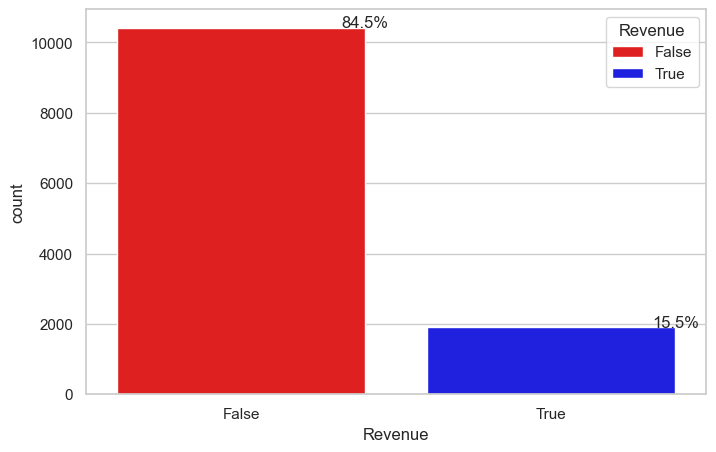

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

# Assuming df is your DataFrame containing the data
total = float(len(df))
# Define colors for each category
colors = {'False': 'red', 'True': 'blue'}
ax = sns.countplot(x="Revenue", data=df, palette=colors.values(), legend=False, hue='Revenue')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

# Set legend for colors
plt.legend(title='Revenue', loc='upper right', labels=colors.keys())

plt.show()

C:\Users\wahab\AppData\Local\Temp\ipykernel_16312\2338358377.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="VisitorType", data=df,


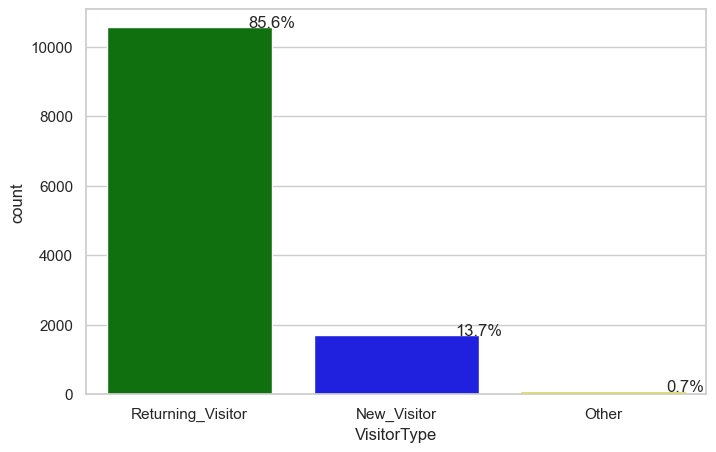

In [8]:
visitor_type_counts = df['VisitorType'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

total = float(len(df))
ax = sns.countplot(x="VisitorType", data=df,
                   palette={"Returning_Visitor": "green", "New_Visitor": "blue", "Other": "yellow"})

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

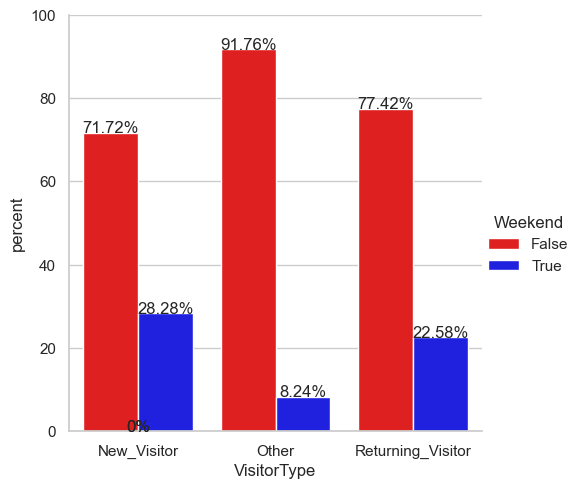

In [9]:
x, y = 'VisitorType', 'Weekend'

# Group by 'VisitorType' and 'Weekend' and calculate the percentage
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

# Define colors for each category
colors = {'Returning_Visitor': 'red', 'New_Visitor': 'blue', 'Other': 'yellow'}

# Plotting with custom color palette
g = sns.catplot(x=x, y='percent', hue=y, kind='bar', data=df1, palette=colors.values())
g.ax.set_ylim(0, 100)

# Adding percentage labels to the bars
for p in g.ax.patches:
    txt = str(round(p.get_height(), 2)) + '%'
    txt_x = p.get_x() + p.get_width() / 2
    txt_y = p.get_height()
    g.ax.text(txt_x, txt_y, txt, ha='center')

plt.show()

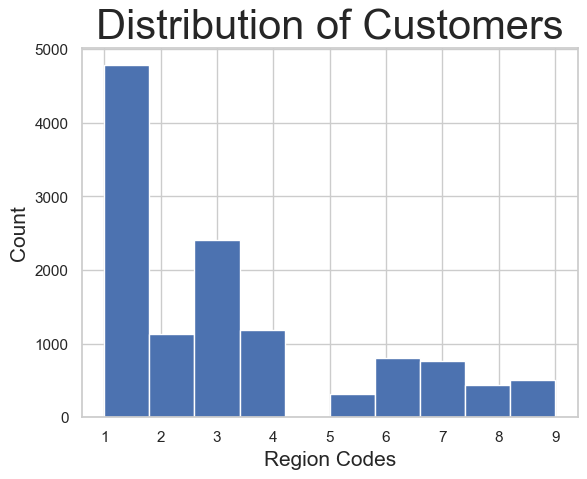

In [10]:
plt.hist(df['Region'])
plt.title('Distribution of Customers', fontsize=30)
plt.xlabel('Region Codes', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

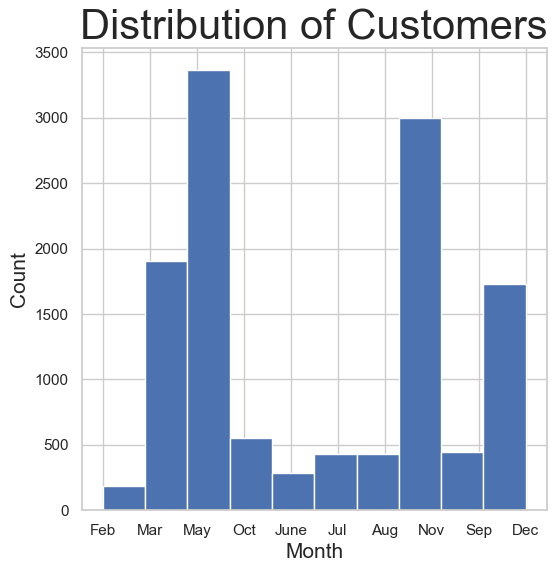

In [228]:
plt.hist(df['Month'])
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

<Axes: xlabel='Revenue', ylabel='PageValues'>

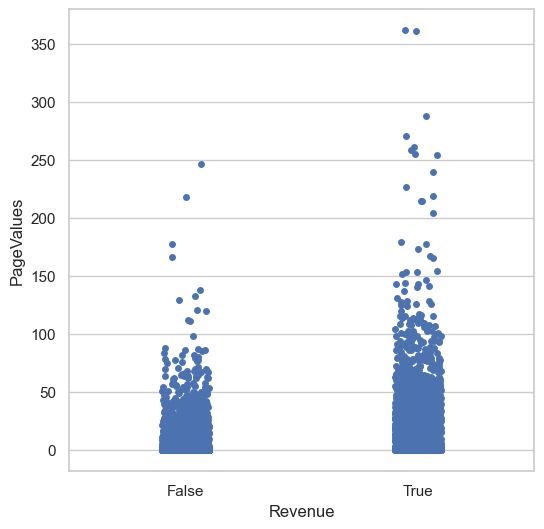

In [229]:
sns.stripplot(x=df['Revenue'], y=df['PageValues'])

<Axes: xlabel='Revenue', ylabel='BounceRates'>

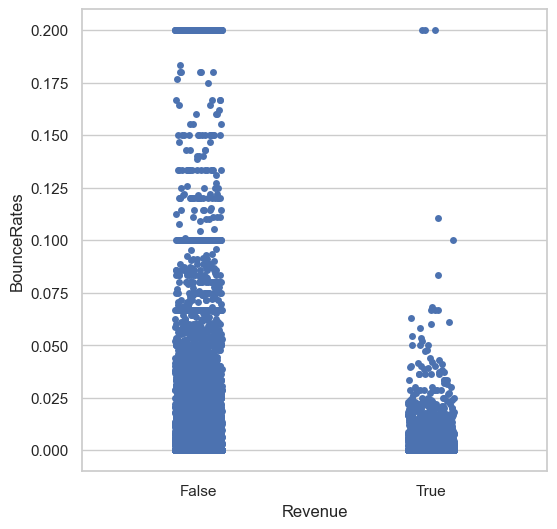

In [230]:
sns.stripplot(x=df['Revenue'], y=df['BounceRates'])

C:\Users\wahab\anaconda3\envs\GENERAL\Lib\site-packages\sklearn\cluster\_kmeans.py:1435: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


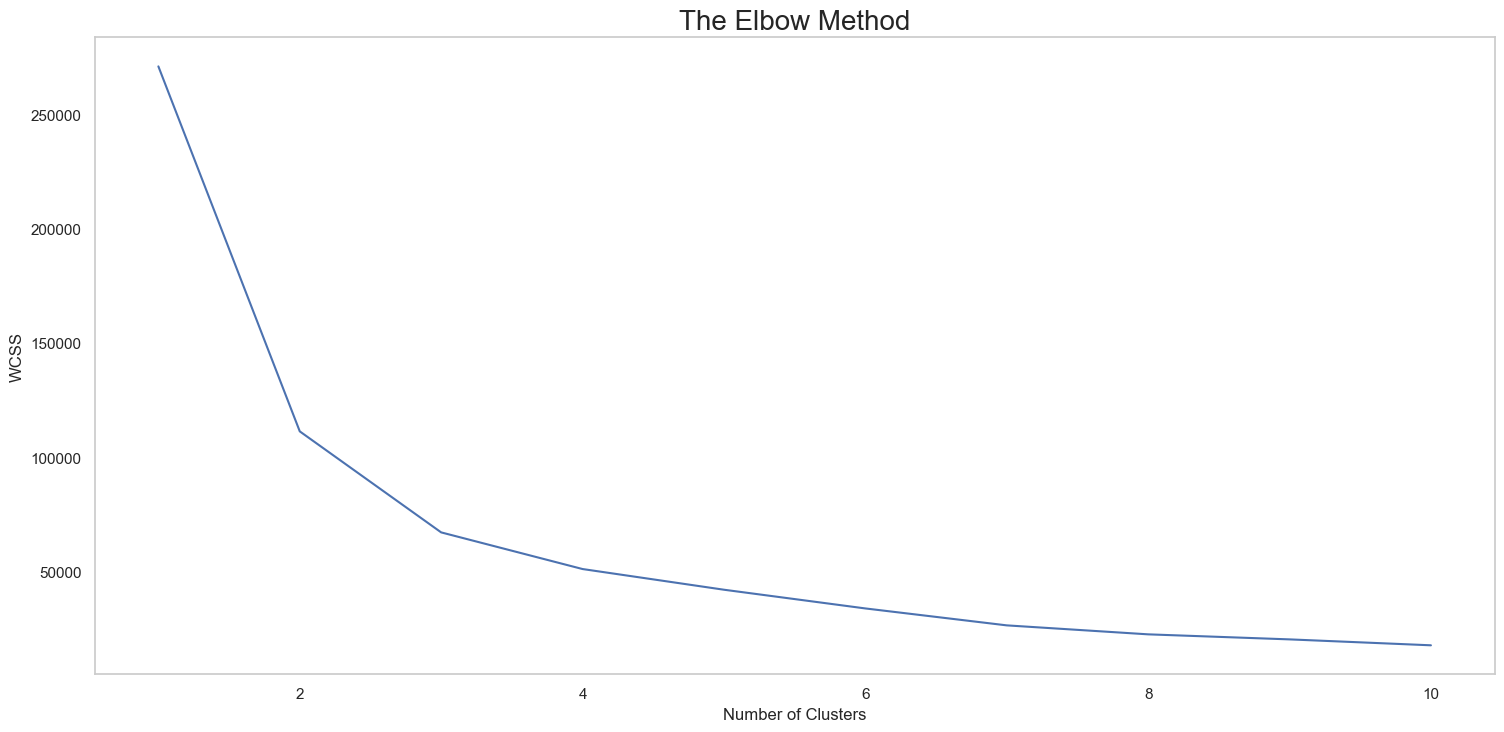

In [235]:
# Prepare the dataset
x = df.iloc[:, [13, 14]].values

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0,
                algorithm='elkan',
                tol=0.001)
    km.fit(x)
    wcss.append(km.inertia_)

# Plot the Elbow Method
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


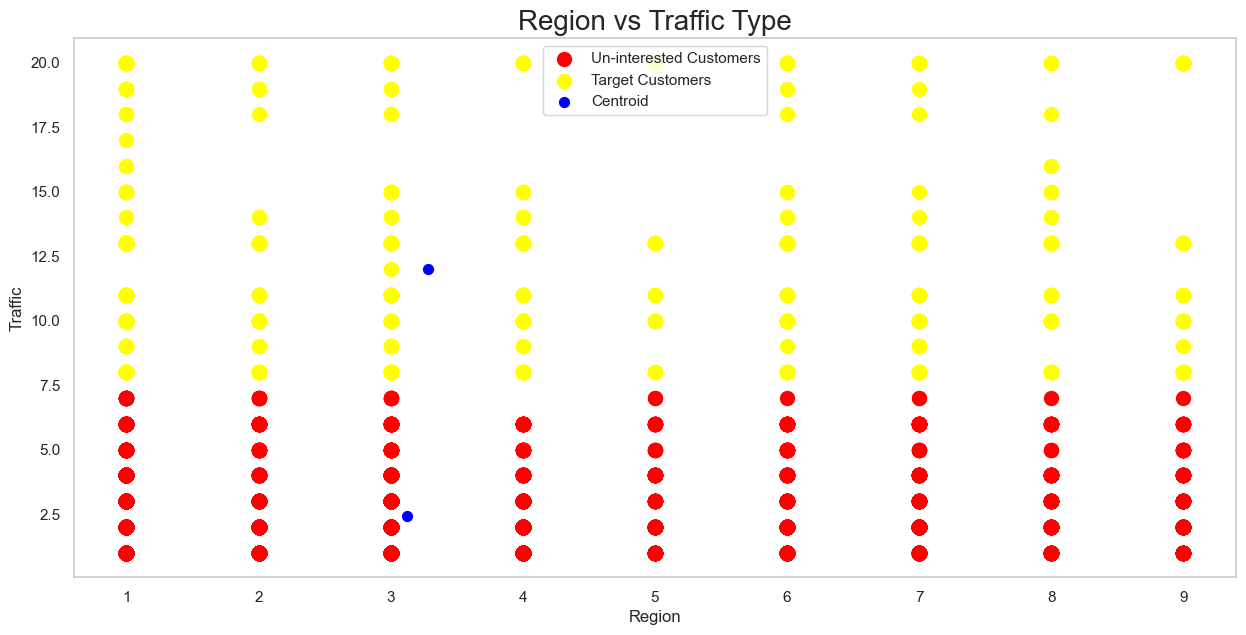

In [236]:
# Creating KMeans object
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Predicting the cluster labels
y_means = km.fit_predict(x)

# Plotting the clusters
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='red', label='Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='yellow', label='Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='blue', label='Centroid')

# Adding title, labels, and legend
plt.title('Region vs Traffic Type', fontsize=20)
plt.xlabel('Region')
plt.ylabel('Traffic')
plt.legend()
plt.grid()

# Display the plot
plt.show()

In [124]:
import pandas as pd

# One-hot encoding
data1 = pd.get_dummies(df)
print("Columns after one-hot encoding:", data1.columns)

# Label encoding for the target column 'Revenue'
le = LabelEncoder()
df['Revenue'] = le.fit_transform(df['Revenue'])
print("Value counts after label encoding for 'Revenue':")
print(df['Revenue'].value_counts())

# Getting dependent and independent variables
x = data1.drop(['Revenue'], axis=1)
y = data1['Revenue']

# Checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Columns after one-hot encoding: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')
Value counts after label encoding for 'Revenue':
Revenue
0    10422
1     1908
Name: count, dtype: int64
Shape of x: (12330, 28)
Shape of y: (12330,)


In [125]:
from sklearn.model_selection import train_test_split

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Checking the shape
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (8631, 28)
Shape of y_train: (8631,)
Shape of x_test: (3699, 28)
Shape of y_test: (3699,)


In [139]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [140]:
importances = rf.feature_importances_

In [141]:
feature_scores = pd.Series(importances, index=x_train.columns)
feature_scores.sort_values(ascending=False, inplace=True)

In [142]:
feature_scores

PageValues                       0.363994
ExitRates                        0.087027
ProductRelated_Duration          0.085511
ProductRelated                   0.073250
Administrative_Duration          0.057819
BounceRates                      0.057628
Administrative                   0.043912
TrafficType                      0.032085
Region                           0.030771
Informational_Duration           0.025874
Browser                          0.020301
Month_Nov                        0.019830
OperatingSystems                 0.018378
Informational                    0.017482
Weekend                          0.010442
VisitorType_Returning_Visitor    0.008985
VisitorType_New_Visitor          0.007781
Month_May                        0.006711
Month_Dec                        0.005765
Month_Mar                        0.004637
Month_Aug                        0.003986
Month_Sep                        0.003982
Month_Jul                        0.003961
Month_Oct                        0

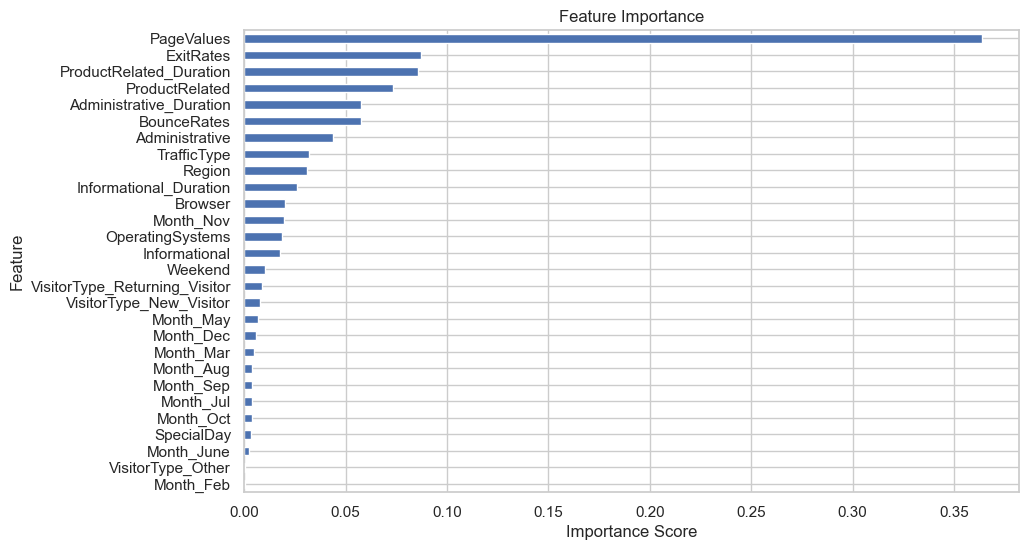

In [143]:
plt.figure(figsize=(10, 6))
feature_scores.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [162]:
k = 5
top_k_features = feature_scores.head(k).index.tolist()

In [160]:
X_train_selected = x_train[top_k_features]
X_test_selected = x_test[top_k_features]

rf_selected = RandomForestClassifier()
rf_selected.fit(X_train_selected, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3077
           1       0.76      0.56      0.64       622

    accuracy                           0.90      3699
   macro avg       0.84      0.76      0.79      3699
weighted avg       0.89      0.90      0.89      3699



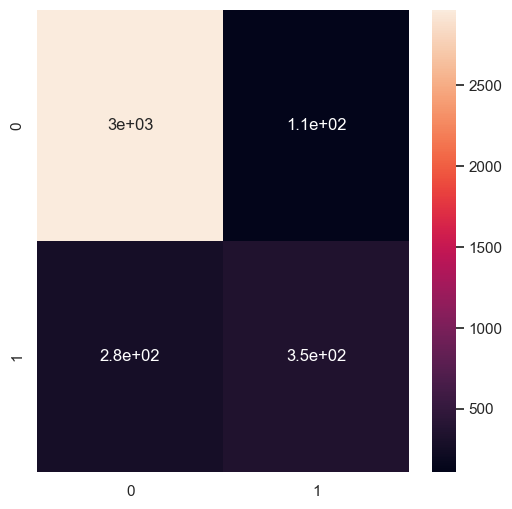

In [161]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot=True)

# Classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [196]:
cm

array([[2909,  168],
       [ 285,  337]], dtype=int64)

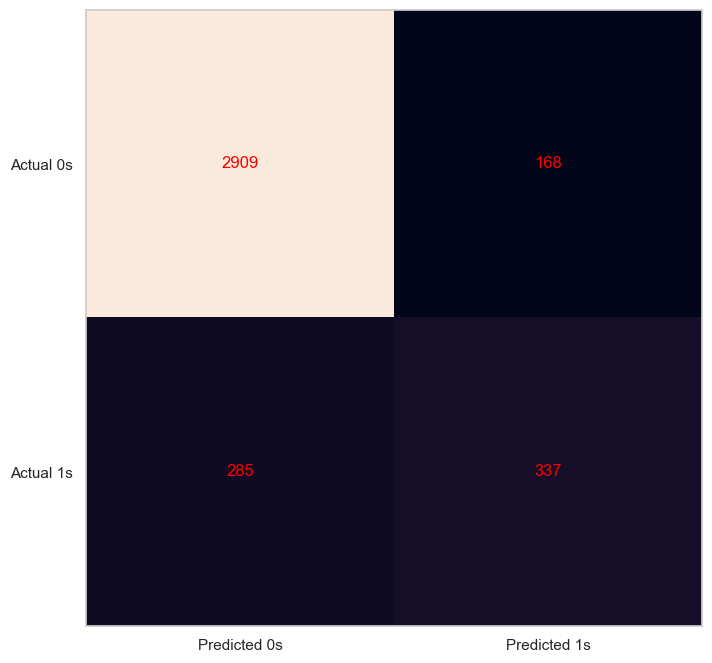

In [198]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, rf_selected.predict(X_test_selected))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

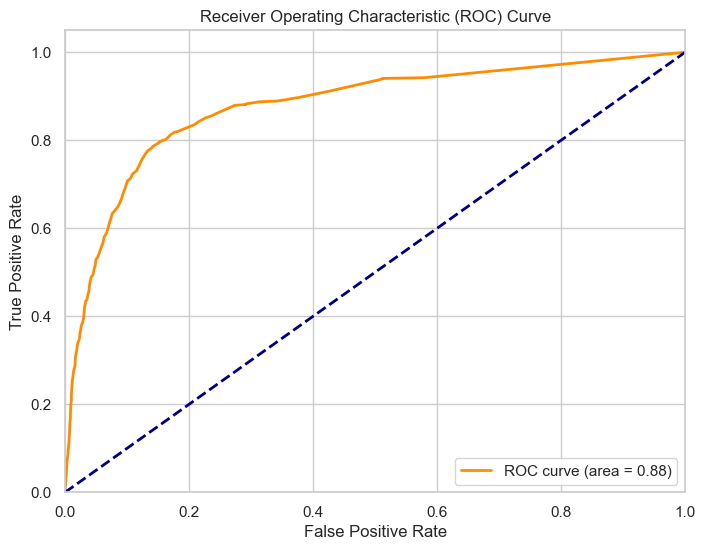

In [199]:
from sklearn.metrics import roc_curve, auc

# Get the probability estimates of the positive class
y_score = rf_selected.predict_proba(X_test_selected)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [209]:
df=pd.DataFrame(y_pred,columns=["Revenue"])
df

,Revenue
0,0
1,0
2,0
3,0
4,0
...,...
3694,0
3695,1
3696,0
3697,0


In [204]:
from sklearn.linear_model import LogisticRegression

# Creating and training the logistic regression model
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(X_train_selected, y_train)

# Predicting on the test set
y_pred1 = model1.predict(X_test_selected)

In [205]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[2967  110]
 [ 276  346]]


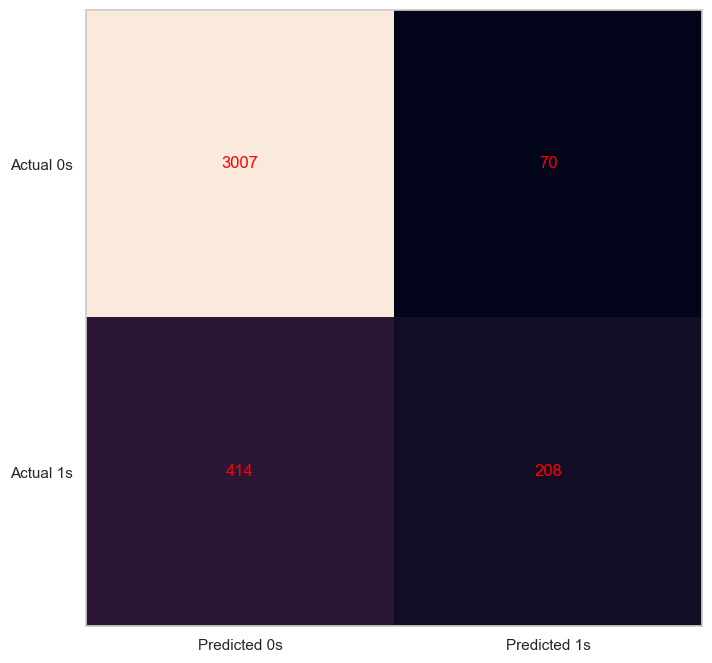

In [208]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, model1.predict(X_test_selected))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

# Add text annotations to the plot
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()


In [210]:
# Generate the classification report
cr1 = classification_report(y_test, y_pred1)

# Print the classification report
print(cr1)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3077
           1       0.75      0.33      0.46       622

    accuracy                           0.87      3699
   macro avg       0.81      0.66      0.69      3699
weighted avg       0.86      0.87      0.85      3699



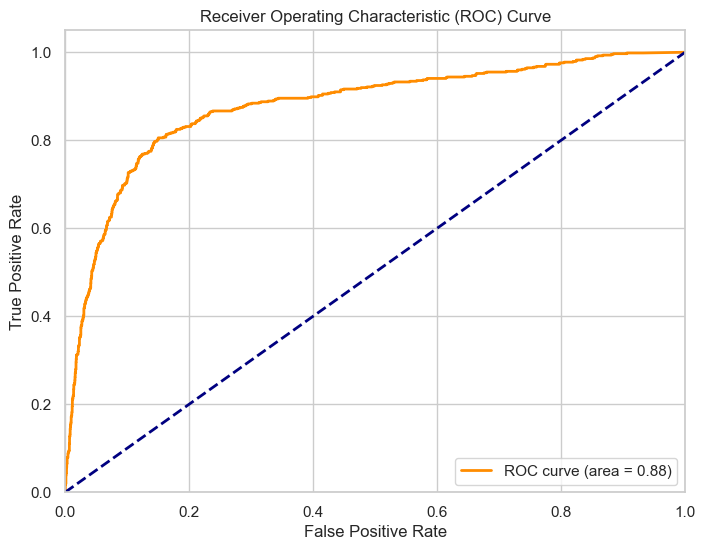

In [212]:
from sklearn.metrics import roc_curve, auc

# Get the probability estimates of the positive class
y_score = model1.predict_proba(X_test_selected)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [213]:
df1 = pd.DataFrame(y_pred1, columns=["Revenue"])
df1

,Revenue
0,0
1,0
2,0
3,0
4,0
...,...
3694,0
3695,1
3696,0
3697,0


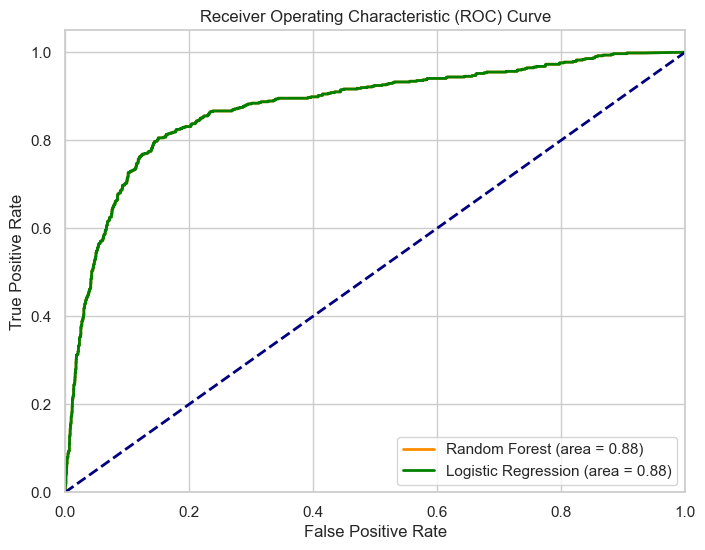

In [215]:
from sklearn.metrics import roc_curve, auc

# Get the probability estimates of the positive class for each model
y_score_rf = model1.predict_proba(X_test_selected)[:, 1]
y_score_lr = model1.predict_proba(X_test_selected)[:, 1]

# Compute ROC curve and AUC for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curves for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
